# <center> <b> Outlier Detection </b> </center>

### Step 1:Importing necessary libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Step 2: Data Loading

In [2]:
# Downloading the dataset
df = pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


### Step 3:Data Analysis

In [3]:
#Display the first few rows of the dataset
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [4]:
#Display the last few rows of the dataset
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [5]:
#Display concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [6]:
# Display statistical summary of the dataFram
df.describe(include='all')

,location,size,total_sqft,bath,price,bhk,price_per_sqft
count,13200,13200,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
unique,241,31,NaN,NaN,NaN,NaN,NaN
top,other,2 BHK,NaN,NaN,NaN,NaN,NaN
freq,2872,5192,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,NaN,NaN,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,NaN,NaN,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,NaN,NaN,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,NaN,NaN,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,NaN,NaN,1672.000000,3.000000,120.000000,3.000000,7.317000e+03


In [7]:
#To check if there are any missing values in dataset
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [8]:
#To check if there are any missing values in dataset
df.notnull().sum()

location          13200
size              13200
total_sqft        13200
bath              13200
price             13200
bhk               13200
price_per_sqft    13200
dtype: int64

In [9]:
#To view all column names of DataFrame
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [10]:
#To check if there are any duplicates in dataset
df.duplicated().sum()

1049

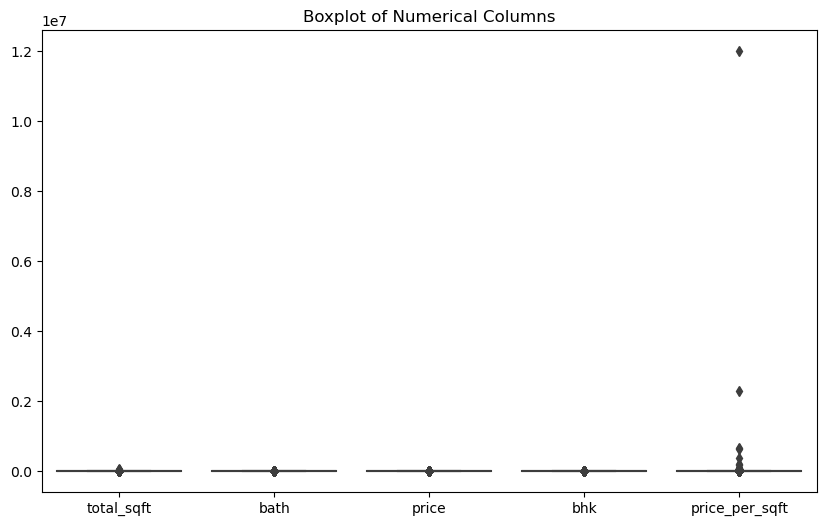

In [11]:
#Plot boxplot for all the numerical columns to check outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Columns')
plt.show()

C:\Users\Windows10\AppData\Local\Temp\ipykernel_43780\1036002292.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'], kde=True)


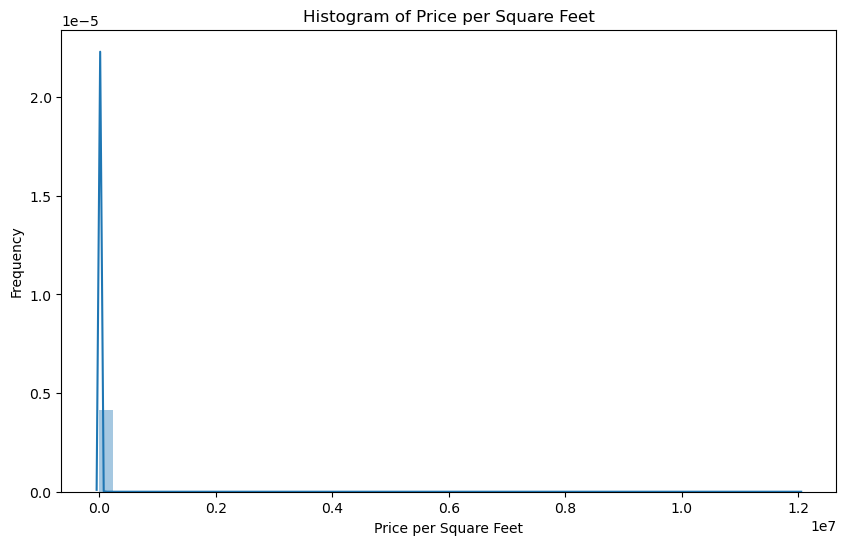

In [12]:
#plot distplot to understanding data distribution and identifying outliers
plt.figure(figsize=(10,6))  
sns.distplot(df['price_per_sqft'], kde=True)
plt.title('Histogram of Price per Square Feet')
plt.xlabel('Price per Square Feet')
plt.ylabel('Frequency')
plt.show()

### Step 4: Data Preprocessing

In [13]:
# Remove duplicates
# Remove duplicate rows from the original DataFrame
#df.drop_duplicates(inplace=True)

df=df.drop_duplicates()
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


### >>Detect outliers and remove them using different methods

####  Method 1: Mean Function

In [14]:
#calculates the mean of the 'price_per_sqft' column in the DataFrame df using the mean() 
mean=df['price_per_sqft'].mean()
mean

8132.641840177763

In [15]:
#calculates the mean of the 'price_per_sqft' column in the DataFrame df using the mean() 
median=df['price_per_sqft'].median()
median

5500.0

#### There is a significant difference between mean and median.indicating presence of outliers

In [16]:
percentiles =df.price_per_sqft.quantile([0.02,0.04,0.06,0.08,0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80,
                                         0.85,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99])
percentiles 

0.02     2805.0
0.04     3000.0
0.06     3243.0
0.08     3412.0
0.10     3513.0
0.20     4085.0
0.30     4545.0
0.40     5000.0
0.50     5500.0
0.60     6096.0
0.70     6896.0
0.80     8235.0
0.85     9674.5
0.89    11336.5
0.90    11904.0
0.91    12500.0
0.92    13129.0
0.93    13835.5
0.94    14695.0
0.95    15600.0
0.96    16666.0
0.97    18000.0
0.98    20000.0
0.99    24000.0
Name: price_per_sqft, dtype: float64

#### There is an significant variation 94 percentile, indicating presence of outliers.

In [17]:
# Filter the DataFrame for values above the 94rd percentile (outliers)
df1_outlier = df[df['price_per_sqft'] > df['price_per_sqft'].quantile(0.94)]
df1_outlier 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
69,other,3 Bedroom,500.0,3.0,100.0,3,20000
...,...,...,...,...,...,...,...
13114,other,3 BHK,1903.0,2.0,293.0,3,15396
13141,other,3 Bedroom,2000.0,2.0,360.0,3,18000
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571


In [18]:
# Calculate the number of outliers
num_outliers = len(df1_outlier )
num_outliers

729

In [19]:
# Filter the DataFrame for values below or equal to the 94th percentile (data points without outliers)
df1_no_outliers = df[df['price_per_sqft'] <= df.price_per_sqft.quantile(0.94)]
df1_no_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


C:\Users\Windows10\AppData\Local\Temp\ipykernel_43780\2685272643.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_no_outliers['price_per_sqft'])


Text(0.5, 1.0, 'Distribution Plot of Price per Square Feet (Data without Outliers)')

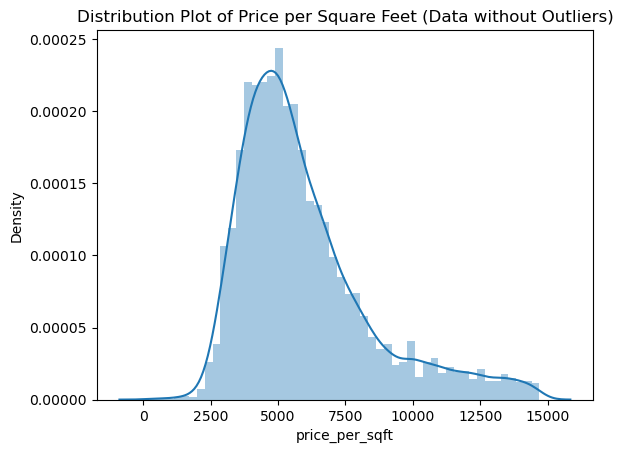

In [20]:
# Plot distribution plot
sns.distplot(df1_no_outliers['price_per_sqft'])
plt.title('Distribution Plot of Price per Square Feet (Data without Outliers)')

<Axes: >

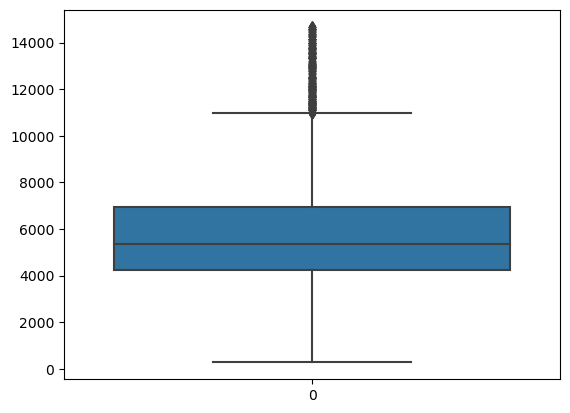

In [21]:
# Plot box plot
sns.boxplot(df1_no_outliers['price_per_sqft'])

#### Method 2: Percentile method 

In [22]:
upper_limit=df['price_per_sqft'].quantile(.95)
lower_limit=df['price_per_sqft'].quantile(0.05)

In [23]:
# Filter the DataFrame for values less than the 5th percentile and greater than the 95th percentile
df2_outliers = df[(df['price_per_sqft'] < lower_limit) | (df['price_per_sqft'] > upper_limit)]
df2_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.00,1,2500
41,Sarjapur Road,3 BHK,1254.0,3.0,38.00,3,3030
45,HSR Layout,8 Bedroom,600.0,9.0,200.00,8,33333
...,...,...,...,...,...,...,...
13121,Electronic City Phase II,3 BHK,1651.0,3.0,49.53,3,3000
13141,other,3 Bedroom,2000.0,2.0,360.00,3,18000
13142,other,2 BHK,1140.0,1.0,185.00,2,16228
13155,Kothannur,4 Bedroom,1600.0,4.0,45.00,4,2812


In [24]:
# Calculate the number of outliers
num_outliers = len(df2_outliers)
num_outliers


1211

In [25]:
df2_no_outliers = df[(df['price_per_sqft'] >= lower_limit) & (df['price_per_sqft'] <= upper_limit)]
df2_no_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


C:\Users\Windows10\AppData\Local\Temp\ipykernel_43780\610540278.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2_no_outliers['price_per_sqft'])


Text(0.5, 1.0, 'Distribution Plot of Price Per Sqft (No Outliers)')

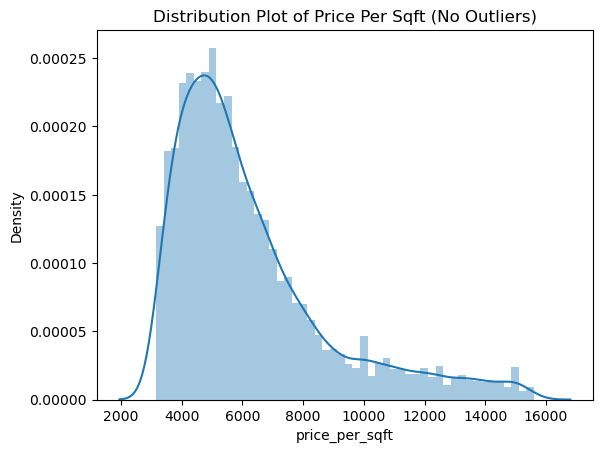

In [26]:
# Plot distribution plot
sns.distplot(df2_no_outliers['price_per_sqft'])
plt.title("Distribution Plot of Price Per Sqft (No Outliers)")

Text(0.5, 1.0, 'Box Plot of Price per Square Feet (Percentile Method)')

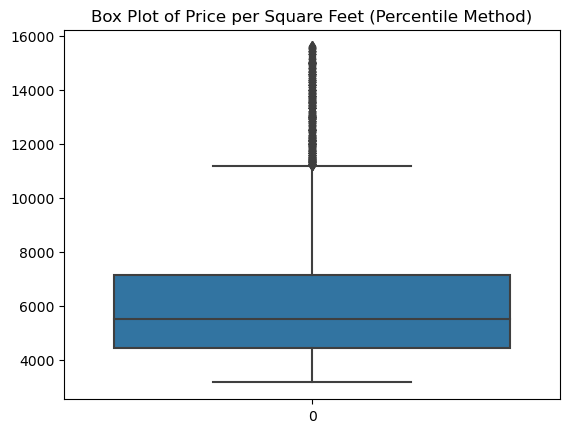

In [27]:
# Plot box plot
sns.boxplot(df2_no_outliers['price_per_sqft'])
plt.title('Box Plot of Price per Square Feet (Percentile Method)')

In [28]:
#capping_change the outlier values to upper or lower limit value
cap_df=df.copy()
cap_df.loc[(cap_df['price_per_sqft']>upper_limit),'price_per_sqft']=upper_limit
cap_df.loc[(cap_df['price_per_sqft']<lower_limit),'price_per_sqft']=lower_limit

C:\Users\Windows10\AppData\Local\Temp\ipykernel_43780\442399784.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cap_df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

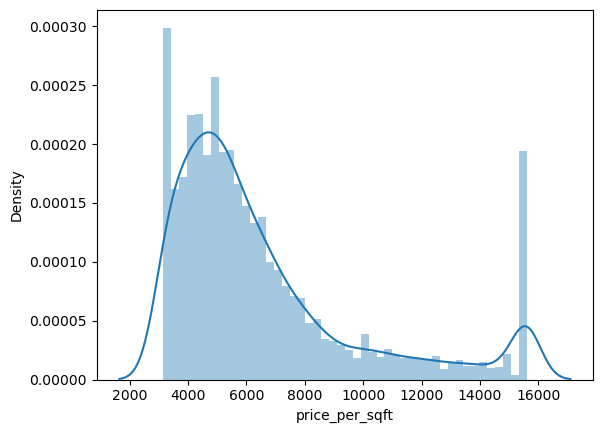

In [29]:
sns.distplot(cap_df['price_per_sqft'])

<Axes: >

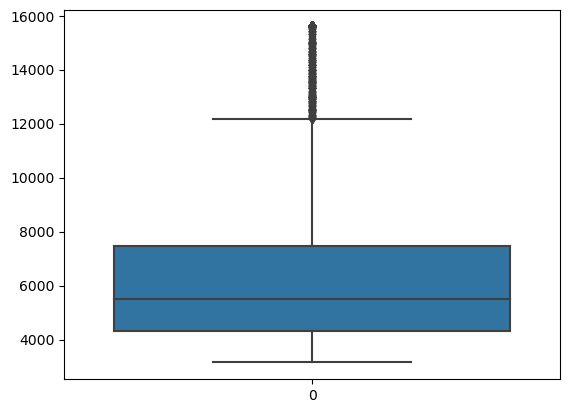

In [30]:
sns.boxplot(cap_df['price_per_sqft'])

#### Method 3: IQR (Inter quartile range method)

In [31]:
# Calculate First quartile (25th percentile)
q1 = df['price_per_sqft'].quantile(0.25)  
q1

4312.0

In [32]:
# Calculate Third quartile (75th percentile)
q3 = df['price_per_sqft'].quantile(0.75)
q3

7461.0

In [33]:
# Calculate interquartile range (IQR)
IQR = q3 - q1
IQR


3149.0

In [34]:
# Define lower_whisker for outliers
lower_whisker = q1 - (1.5 * IQR)
lower_whisker

-411.5

In [35]:
# Define upper_whisker for outliers
upper_whisker = q3 + (1.5 * IQR)
upper_whisker

12184.5

In [36]:
# Identify outliers
df3_outliers = df[(df['price_per_sqft'] < lower_whisker) | (df['price_per_sqft'] >upper_whisker )]
df3_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13114,other,3 BHK,1903.0,2.0,293.0,3,15396
13141,other,3 Bedroom,2000.0,2.0,360.0,3,18000
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571


In [37]:
# Calculate the number of outliers
num_outliers = len(df3_outliers)
num_outliers

1142

In [38]:
# Filter dataframe based on IQR method outlier removal
df3_no_outliers = df[(df['price_per_sqft'] >= lower_whisker) & (df['price_per_sqft'] <=upper_whisker)]
df3_no_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


C:\Users\Windows10\AppData\Local\Temp\ipykernel_43780\4211250306.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_no_outliers['price_per_sqft'])


Text(0.5, 1.0, 'Distribution Plot of Price per Square Feet (Percentile Method)')

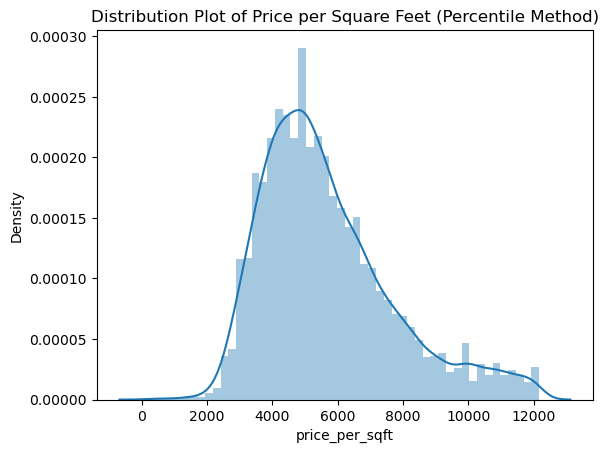

In [39]:
# Plot distribution plot
sns.distplot(df3_no_outliers['price_per_sqft'])
plt.title('Distribution Plot of Price per Square Feet (Percentile Method)')

Text(0.5, 1.0, 'Box Plot of Price per Square Feet (IQR Method)')

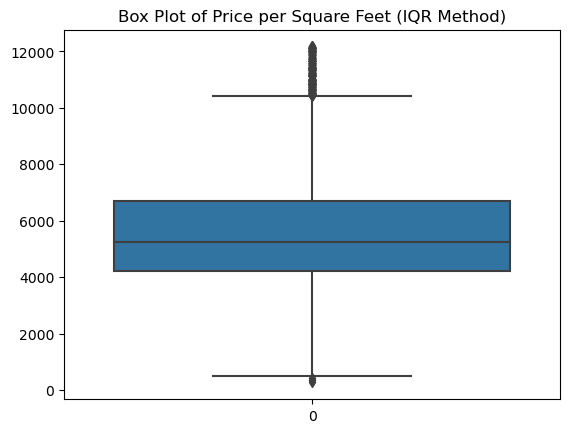

In [40]:
# Plot box plot
sns.boxplot(df3_no_outliers['price_per_sqft'])
plt.title('Box Plot of Price per Square Feet (IQR Method)')

In [41]:
#capping_change the outlier values to upper or lower limit value
cap_df=df.copy()
cap_df.loc[(cap_df['price_per_sqft']>upper_whisker),'price_per_sqft']=upper_whisker
cap_df.loc[(cap_df['price_per_sqft']<lower_whisker),'price_per_sqft']=lower_whisker

C:\Users\Windows10\AppData\Local\Temp\ipykernel_43780\442399784.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cap_df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

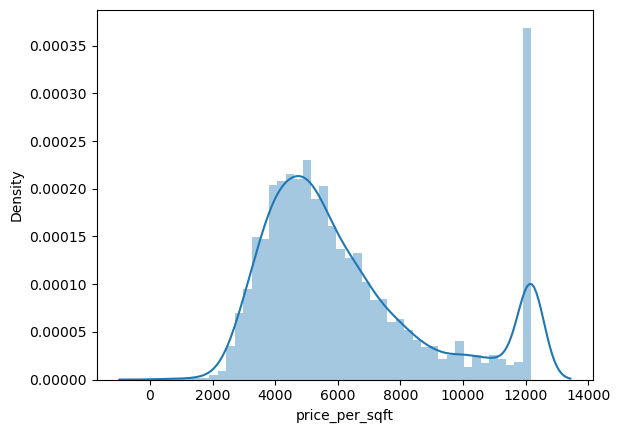

In [42]:
sns.distplot(cap_df['price_per_sqft'])

<Axes: >

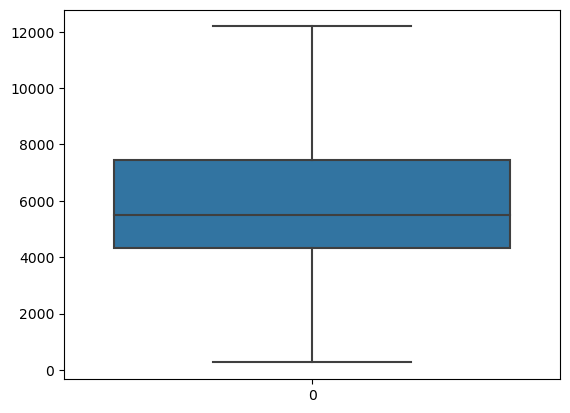

In [43]:
sns.boxplot(cap_df['price_per_sqft'])

####  Method 4: Normal distribution

In [44]:
# Calculate mean 
mean = df['price_per_sqft'].mean()
mean

8132.641840177763

In [45]:
#Calculate standard deviation
std_dev = df['price_per_sqft'].std()
std_dev 

111232.9008957087

In [46]:
# Define limit for normal distribution
upper_limit= mean+3*std_dev
lower_limit= mean-3*std_dev

In [47]:
# Detect outliers
df4_outliers = df[(df['price_per_sqft'] < (lower_limit)) | (df['price_per_sqft'] > (upper_limit))]
df4_outliers 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [48]:
# Calculate the number of outliers
num_outliers = len(df4_outliers)
num_outliers

5

In [49]:
# Remove outliers
df4_no_outliers  = df[(df['price_per_sqft'] >= (mean-3*std_dev)) & (df['price_per_sqft'] <=  mean+3*std_dev)]
df4_no_outliers  

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


C:\Users\Windows10\AppData\Local\Temp\ipykernel_43780\412012122.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4_no_outliers['price_per_sqft'],)


Text(0.5, 1.0, 'Distribution Plot of Price Per Sqft (Outliers Removed -Normal distribution)')

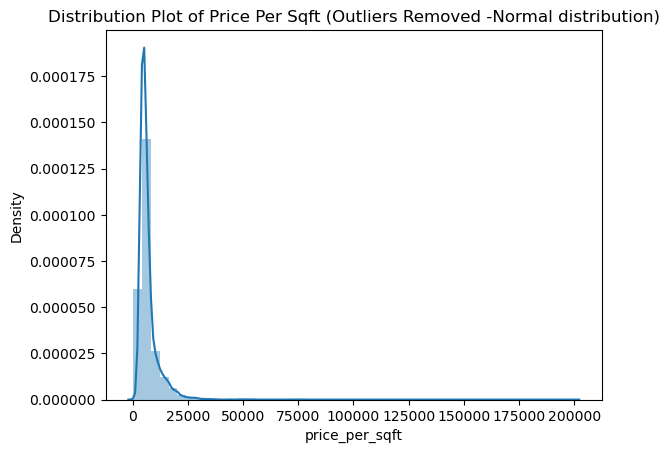

In [50]:
# Plot distribution plot
sns.distplot(df4_no_outliers['price_per_sqft'],)
plt.title("Distribution Plot of Price Per Sqft (Outliers Removed -Normal distribution)")

Text(0.5, 1.0, 'Box Plot of Price per Square Feet (Normal distribution)')

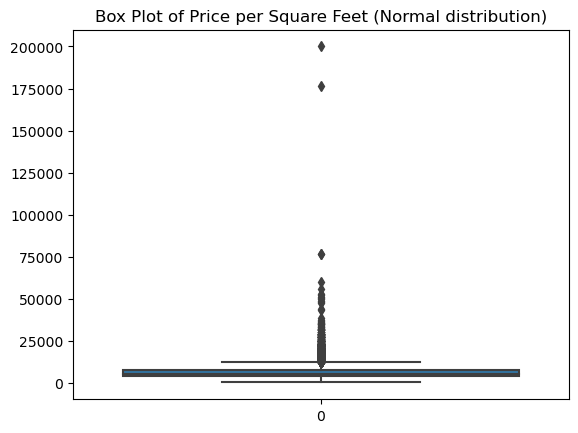

In [51]:
# Plot box plot
sns.boxplot(df4_no_outliers['price_per_sqft'])
plt.title('Box Plot of Price per Square Feet (Normal distribution)')

####  Method 5: Zscore method

In [52]:
#calculates the mean of the 'price_per_sqft' column in the DataFrame df using the mean() 
mean=df['price_per_sqft'].mean()
mean

8132.641840177763

In [53]:
#calculates the standard deviation of the 'price_per_sqft' column in the DataFrame df using the std()
std_dev=df['price_per_sqft'].std()
std_dev

111232.9008957087

#### Zscore=(x-mean)/std

In [54]:
# Create a new DataFrame
df_ZScore = df.copy()

In [55]:
#Zscore of price_per_sqft column
df_ZScore ["ZScore"]=(df_ZScore .price_per_sqft-mean)/std_dev
df_ZScore 

,location,size,total_sqft,bath,price,bhk,price_per_sqft,ZScore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039859
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.031624
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.034411
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.016970
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034906
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530,-0.014408
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.012979
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.026776
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.025843


In [56]:
# Define limit for Z-score
upper_limit= 3
lower_limit= -3

In [57]:
# Filter the DataFrame for outliers based on Z-scores outside the range of -3 to 3
df5_outliers = df_ZScore [(df_ZScore['ZScore'] <-3) | (df_ZScore['ZScore']>3)]
df5_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft,ZScore
345,other,3 Bedroom,11.0,3.0,74.0,3,672727,5.974800
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000,5.545728
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000,107.808636
4924,other,7 BHK,5.0,7.0,115.0,7,2300000,20.604222
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333,3.193303


In [58]:
# Calculate the number of outliers
num_outliers = len(df5_outliers )
num_outliers

5

In [59]:
#Data without outliers
df5_no_outliers = df[(df_ZScore['ZScore'] >= -3) & (df_ZScore['ZScore'] <= 3)]
df5_no_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


C:\Users\Windows10\AppData\Local\Temp\ipykernel_43780\1796383960.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df5_no_outliers['price_per_sqft'],)


Text(0.5, 1.0, 'Distribution Plot of Price Per Sqft (Outliers Removed -ZScore method)')

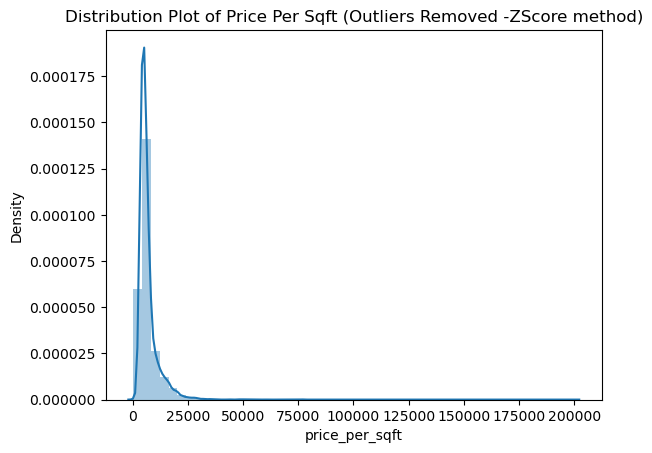

In [60]:
# Plot distribution plot
sns.distplot(df5_no_outliers['price_per_sqft'],)
plt.title("Distribution Plot of Price Per Sqft (Outliers Removed -ZScore method)")

Text(0.5, 1.0, 'Box Plot of Price per Square Feet ZScore method')

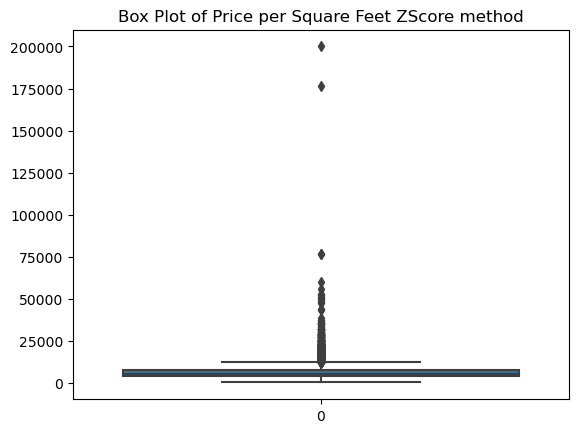

In [61]:
# Plot box plot
sns.boxplot(df5_no_outliers['price_per_sqft'])
plt.title('Box Plot of Price per Square Feet ZScore method')

In [62]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [63]:
#Check correlation between all numerical columns 
correlation_matrix = df.corr()
correlation_matrix 

C:\Users\Windows10\AppData\Local\Temp\ipykernel_43780\2244966474.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.386694,0.572516,0.339936,-0.008877
bath,0.386694,1.000000,0.448802,0.898875,0.030133
price,0.572516,0.448802,1.000000,0.390008,0.027415
bhk,0.339936,0.898875,0.390008,1.000000,0.030294
price_per_sqft,-0.008877,0.030133,0.027415,0.030294,1.000000


In [64]:
#plot heatmap

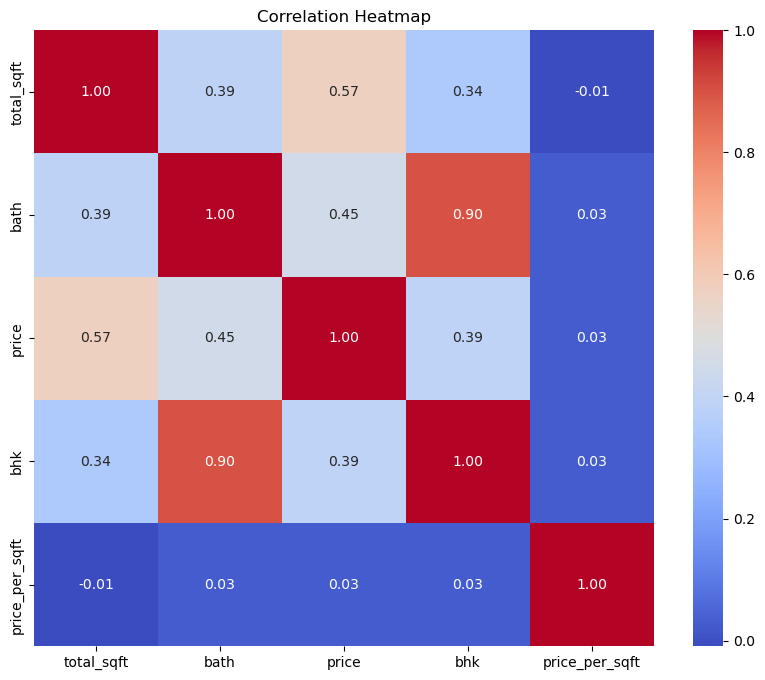

In [65]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### > Total_sqft and price: The correlation coefficient of 0.572516 between total_sqft and price suggests a moderate positive correlation, indicating that as the total square footage of a property increases, its price tends to increase as well.
#### > Bath and bhk: There is a very strong positive correlation (0.898875) between bath and bhk, suggesting that properties with more bedrooms typically also have more bathrooms.
#### >Bath and price: The correlation between bath and price is moderate (0.448802), indicating that higher-priced properties tend to have more bathrooms.
#### >Bhk and price: Similarly, bhk shows a moderate correlation with price (0.390008), reflecting that properties with more bedrooms usually have higher prices.
#### >price_per_sqft: Interestingly, price_per_sqft shows very low correlation with all other variables (near zero with total_sqft, and very slight positive correlations with bath, price, and bhk). This suggests that the price per square foot is not strongly influenced by the size of the property or the number of bedrooms and bathrooms, which could be due to varying factors like location, quality of construction, and market conditions.

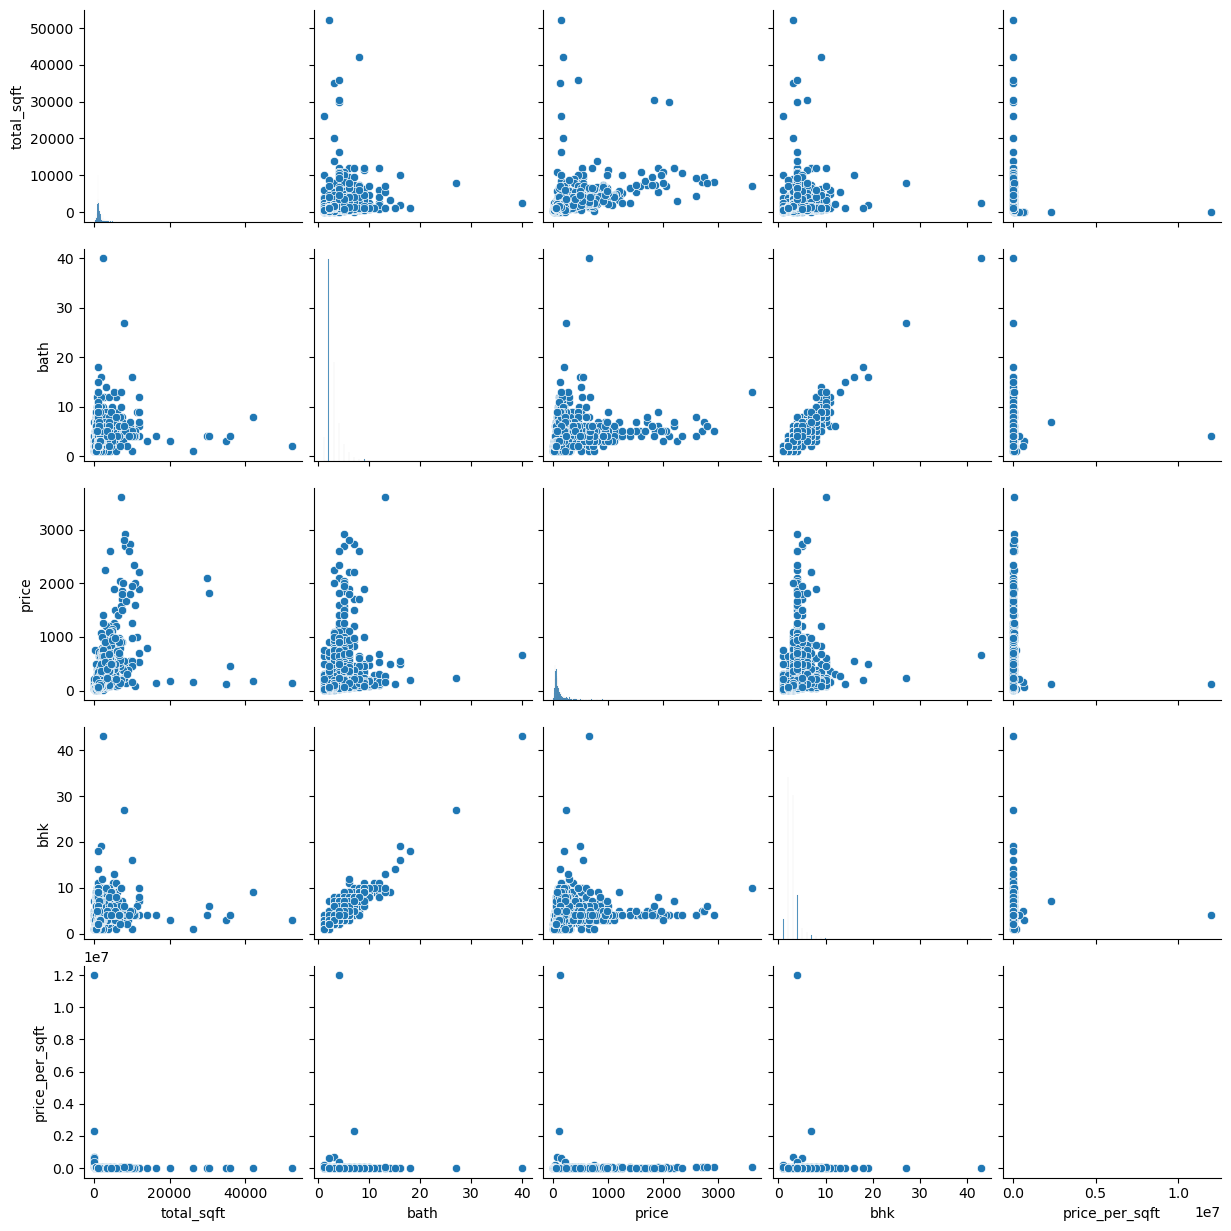

In [66]:
#Scatter plot between variables to check correlation:
sns.pairplot(df)
plt.show()